In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

By using the data from data.csv we can determine the time complexities of the classic and quantum solutions.                                                                                               

In [20]:
df = pd.read_csv('data/data.csv')

The classic algorithm's time complexity is calculated as n*(2^x) where n is the problem size (func) and x is the total wild cards across F1 F2 and F3. 

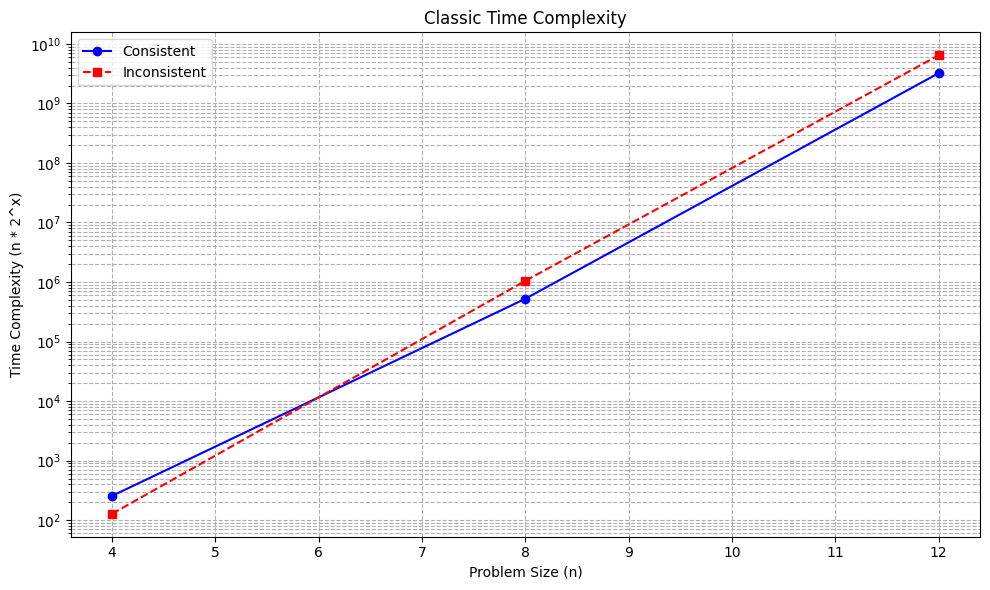

Calculated Complexities:
    n   system_type  complexity
0   4    Consistent         256
1   8    Consistent      524288
2  12    Consistent  3221225472
3   4  Inconsistent         128
4   8  Inconsistent     1048576
5  12  Inconsistent  6442450944


In [ ]:
# count x (wildcards) in data to calculate classic complexity
def calculate_complexity(row):
    total_x = (row['F1'].count('x') + 
              row['F2'].count('x') + 
              row['F3'].count('x'))
    return row['n'] * (2 ** total_x)

df['complexity'] = df.apply(calculate_complexity, axis=1)

consistent = df[df['system_type'] == 'Consistent']
inconsistent = df[df['system_type'] == 'Inconsistent']

# plot data
plt.figure(figsize=(10, 6))

# consistent system
plt.plot(consistent['n'], consistent['complexity'], 
         'o-', label='Consistent', color='blue')

# inconsistent system
plt.plot(inconsistent['n'], inconsistent['complexity'], 
         's--', label='Inconsistent', color='red')

plt.yscale('log')
plt.xlabel('Problem Size (n)')
plt.ylabel('Time Complexity (n * 2^x)')
plt.title('Classic Time Complexity')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()

# display time complexities
print("Calculated Complexities:")
print(df[['n', 'system_type', 'complexity']])

The Quantum Algorithm's time complexity is calculated as n/(error^2) where error is 0.0884, 0.0625, 0.0442.


ϵ=0.0884 complexities:
n=4: 511.87
n=8: 1023.73
n=12: 1535.60

ϵ=0.0625 complexities:
n=4: 1024.00
n=8: 2048.00
n=12: 3072.00

ϵ=0.0442 complexities:
n=4: 2047.46
n=8: 4094.92
n=12: 6142.38


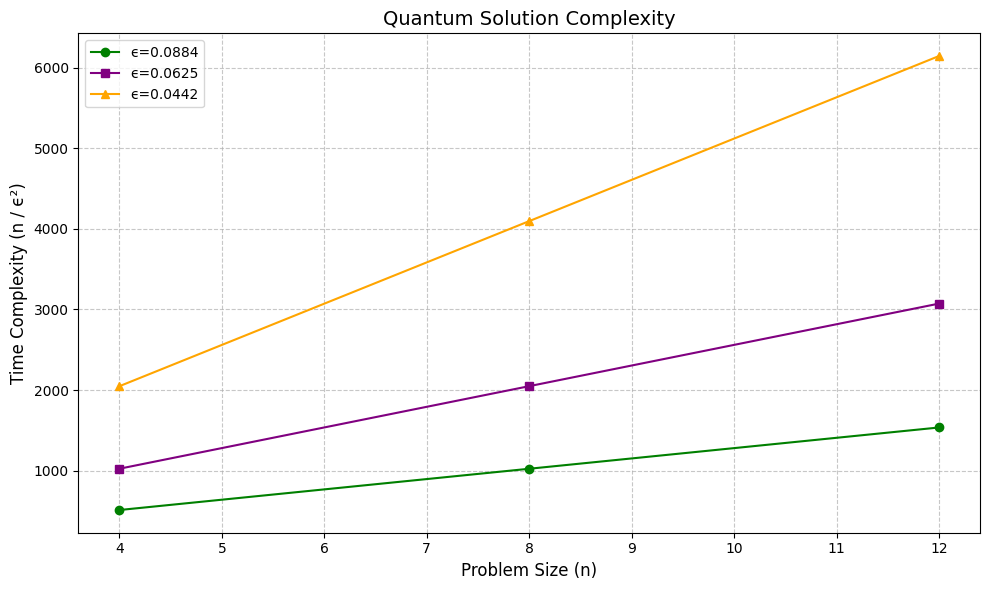

In [ ]:
# calaculate quantum complexities with error values
n = np.array([4, 8, 12])

error_values = {
    'ϵ=0.0884': 0.0884,
    'ϵ=0.0625': 0.0625,
    'ϵ=0.0442': 0.0442
}

quantum_results = []
for eps_label, eps in error_values.items():
    complexities = n / (eps ** 2)
    quantum_results.append((eps_label, complexities))
    
    # display time complexities
    print(f"\n{eps_label} complexities:")
    for size, comp in zip(n, complexities):
        print(f"n={size}: {comp:.2f}")

# plot data
plt.figure(figsize=(10, 6))

markers = ['o', 's', '^']
colors = ['green', 'purple', 'orange']
for i, (eps_label, complexities) in enumerate(quantum_results):
    plt.plot(n, complexities,
             marker=markers[i],
             linestyle='-',
             color=colors[i],
             label=eps_label)
plt.yscale('linear')  
plt.xlabel('Problem Size (n)', fontsize=12)
plt.ylabel('Time Complexity (n / ϵ²)', fontsize=12)
plt.title('Quantum Solution Complexity', fontsize=14)
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()